___
# Ciência dos Dados - Projeto 1

Felipe Aron Nudelman Tabacinik

___
## Como os níveis de escolaridade se relacionam em diferentes classes socioeconômicas da população brasileira em cada estado do país.

____
## Introdução

Este estudo pretende analisar a escolaridade da população brasileira relacionado a renda em cada estado.


___
## Filtros da base de dados

In [59]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [60]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Felipe Aron\Documents\Insper\2A - DP\CD


#### Puxando o dataframe 

In [61]:
dados_2011 = pd.read_csv('PES2011.csv',sep=',')

dados_2015 = pd.read_csv('PES2015.csv',sep=',')

#### Selecionando as variavéis de interesse

In [62]:
interesse_2011 = dados_2011.loc[:,['UF','V0601','V6002','V6003','V6030','V4745','V4743','V4742','V4803']]

interesse_2015 = dados_2015.loc[:,['UF','V0601','V6002','V6003','V6030','V4745','V4743','V4742','V4803']]

#### Regiões

Criando a variável 'Reg' que agloba os valores de UF em 5 grupos (Norte, Nordeste, Sudeste, Sul e Centro-Oeste)

In [63]:
interesse_2011['Reg'] = interesse_2011.UF
interesse_2011.Reg[(interesse_2011.UF>10)&(interesse_2011.UF<=18)]=1
interesse_2011.Reg[(interesse_2011.UF>20)&(interesse_2011.UF<30)]=2
interesse_2011.Reg[(interesse_2011.UF>30)&(interesse_2011.UF<36)]=3
interesse_2011.Reg[(interesse_2011.UF>37)&(interesse_2011.UF<46)]=4
interesse_2011.Reg[(interesse_2011.UF>49)&(interesse_2011.UF<54)]=5

interesse_2015['Reg'] = interesse_2015.UF
interesse_2015.Reg[(interesse_2015.UF>10)&(interesse_2015.UF<=17)]=1
interesse_2015.Reg[(interesse_2015.UF>20)&(interesse_2015.UF<30)]=2
interesse_2015.Reg[(interesse_2015.UF>30)&(interesse_2015.UF<36)]=3
interesse_2015.Reg[(interesse_2015.UF>37)&(interesse_2015.UF<46)]=4
interesse_2015.Reg[(interesse_2015.UF>49)&(interesse_2015.UF<54)]=5

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

#### Limpando o dataframe

In [64]:
interesse_2011.UF = interesse_2011.UF.astype('category')
interesse_2011.UF.cat.categories = ('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas','Sergipe','Bahia', 'Minas Gerais', 'Espirito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná','Santa Catarina','Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'DF')
interesse_2011.V0601 = interesse_2011.V0601.astype('category')
interesse_2011.V0601.cat.categories = ('Sim', 'Não')
interesse_2011.V6002 = interesse_2011.V6002.astype('category')
interesse_2011.V6002.cat.categories = ('Publica', 'Privada')
interesse_2011.V6002 = interesse_2011.V6002.astype('category')
interesse_2011.V6002.cat.categories = ('Publica', 'Privada')
interesse_2011.V6003 = interesse_2011.V6003.astype('category')
interesse_2011.V6003.cat.categories = ('Regular do ensino fundamental', 'Regular do ensino médio','Educação de jovens e adultos ou supletivo do ensino fundamental','Educação de jovens e adultos ou supletivo do ensino médio','Superior de graduação','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA','Maternal, jardim de infância etc.','Pré-vestibular','Mestrado ou doutorado')
interesse_2011.V6030 = interesse_2011.V6030.astype('category')
interesse_2011.V6030.cat.categories = ('8 anos', '9 anos')
interesse_2011.V4745 = interesse_2011.V4745.astype('category')
interesse_2011.V4745.cat.categories = ('Sem instrução', 'Fundamental incompleto ou equivalente','Fundamental completo ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente','Superior completo','Não determinado')
interesse_2011.V4743 = interesse_2011.V4743.astype('category')
interesse_2011.V4743.cat.categories = ('Sem rendimento', 'Até ¼ salário mínimo','Mais de ¼ até ½ salário mínimo','Mais de ½ até 1 salário mínimo','Mais de 1 até 2 salários mínimos','Mais de 2 até 3 salários mínimos','Mais de 3 até 5 salários mínimos','Mais de 5 salários mínimos','Não determinado')
interesse_2011.V4803 = interesse_2011.V4803.astype('category')
interesse_2011.V4803.cat.categories = ('Sem instrução e menos de 1 ano', '1 ano','2 anos','3 anos','4 anos','5 anos','6 anos','7 anos','8 anos','9 anos','10 anos','11 anos','12 anos','13 anos','14 anos','15 anos ou mais','Não determinados')
interesse_2011.Reg = interesse_2011.Reg.astype('category')
interesse_2011.Reg.cat.categories = ('Norte', 'Nordeste','Sudeste','Sul','Centro-Oeste')


interesse_2015.UF = interesse_2015.UF.astype('category')
interesse_2015.UF.cat.categories = ('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas','Sergipe','Bahia', 'Minas Gerais', 'Espirito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná','Santa Catarina','Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'DF')
interesse_2015.V0601 = interesse_2015.V0601.astype('category')
interesse_2015.V0601.cat.categories = ('Sim', 'Não')
interesse_2015.V6002 = interesse_2015.V6002.astype('category')
interesse_2015.V6002.cat.categories = ('Publica', 'Privada')
interesse_2015.V6003 = interesse_2015.V6003.astype('category')
interesse_2015.V6003.cat.categories = ('Regular do ensino fundamental', 'Regular do ensino médio','Educação de jovens e adultos ou supletivo do ensino fundamental','Educação de jovens e adultos ou supletivo do ensino médio','Superior de graduação','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA','Maternal, jardim de infância etc.','Pré-vestibular','Mestrado ou doutorado')
interesse_2015.V6030 = interesse_2015.V6030.astype('category')
interesse_2015.V6030.cat.categories = ('8 anos', '9 anos')
interesse_2015.V4745 = interesse_2015.V4745.astype('category')
interesse_2015.V4745.cat.categories = ('Sem instrução', 'Fundamental incompleto ou equivalente','Fundamental completo ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente','Superior completo','Não determinado')
interesse_2015.V4743 = interesse_2015.V4743.astype('category')
interesse_2015.V4743.cat.categories = ('Sem rendimento', 'Até ¼ salário mínimo','Mais de ¼ até ½ salário mínimo','Mais de ½ até 1 salário mínimo','Mais de 1 até 2 salários mínimos','Mais de 2 até 3 salários mínimos','Mais de 3 até 5 salários mínimos','Mais de 5 salários mínimos','Não determinado')
interesse_2015.V4803 = interesse_2015.V4803.astype('category')
interesse_2015.V4803.cat.categories = ('Sem instrução e menos de 1 ano', '1 ano','2 anos','3 anos','4 anos','5 anos','6 anos','7 anos','8 anos','9 anos','10 anos','11 anos','12 anos','13 anos','14 anos','15 anos ou mais','Não determinados')
interesse_2015.Reg = interesse_2015.Reg.astype('category')
interesse_2015.Reg.cat.categories = ('Norte', 'Nordeste','Sudeste','Sul','Centro-Oeste')

___
## Análise e Resultados

### Fazendo os cross-tab's PNAD 2011

In [65]:
cross_faixa_anos = pd.crosstab(interesse_2011.V4743, interesse_2011.V4803)

cross_faixa_alcancado = pd.crosstab(interesse_2011.V4743, interesse_2011.V4745)

cross_escolaridade_regiao = pd.crosstab(interesse_2011.Reg,interesse_2011.V4745)

cross_renda_regiao = pd.crosstab(interesse_2011.Reg,interesse_2011.V4743)

cross_pp_escolaridade = pd.crosstab(interesse_2011.V6002,interesse_2011.V4745)

cross_pp_renda = pd.crosstab(interesse_2011.V6002,interesse_2011.V4743)

### Fazendo os cross-tab's PNAD 2015

In [66]:
cross_faixa_anos_new = pd.crosstab(interesse_2015.V4743, interesse_2015.V4803)

cross_faixa_alcancado_new = pd.crosstab(interesse_2015.V4743, interesse_2015.V4745)

cross_escolaridade_regiao_new = pd.crosstab(interesse_2015.Reg,interesse_2015.V4745)

cross_renda_regiao_new = pd.crosstab(interesse_2015.Reg,interesse_2015.V4743)

cross_pp_escolaridade_new = pd.crosstab(interesse_2015.V6002,interesse_2015.V4745)

cross_pp_renda_new = pd.crosstab(interesse_2015.V6002,interesse_2015.V4743)

### Mudando o nome das colunas do dataframe

In [67]:
interesse_2011.columns = ["UF","Sabe ler e escrever","Rede de ensino","Curso que frequenta","Duração do ensino fundamental","Nível de instrução mais elevado alcançado (todas as pessoas)","Faixa de rendimento mensal domiciliar per capita","Rendimento mensal domiciliar per capita","Anos de estudo(todas as pessoas)","Região"]

interesse_2015.columns = ["UF","Sabe ler e escrever","Rede de ensino","Curso que frequenta","Duração do ensino fundamental","Nível de instrução mais elevado alcançado (todas as pessoas)","Faixa de rendimento mensal domiciliar per capita","Rendimento mensal domiciliar per capita","Anos de estudo(todas as pessoas)","Região"]

### Plotando os gráficos

### Análise escola pública x privada com escolaridade - PNAD 2011 e 2015

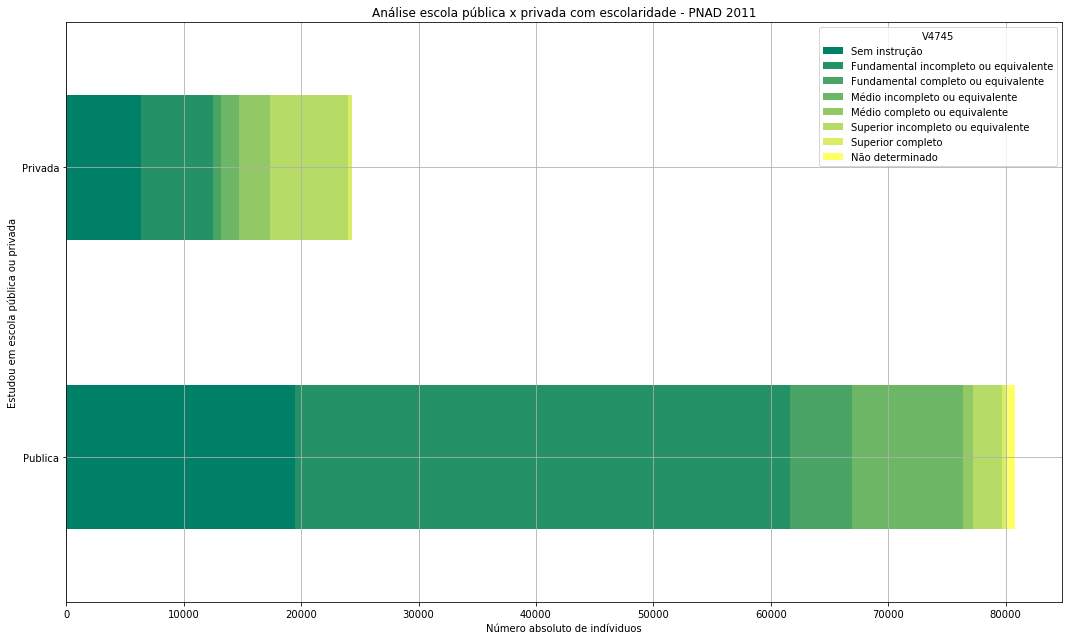

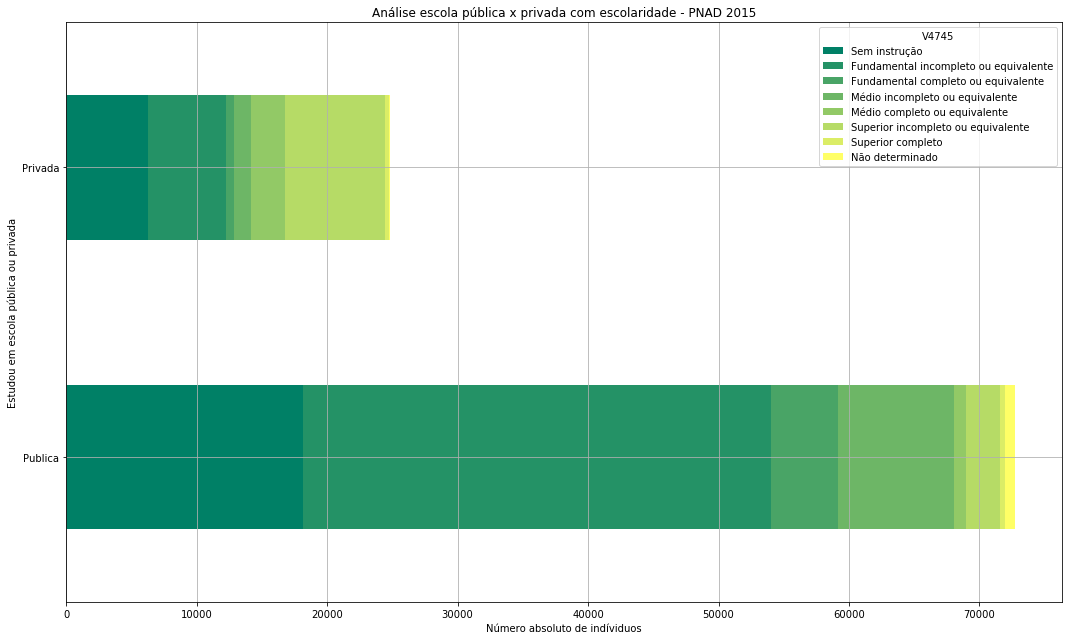

In [76]:
cross_pp_escolaridade.plot(kind='barh',colormap='summer', stacked = True, figsize = (15,9),grid=True)
plt.title('Análise escola pública x privada com escolaridade - PNAD 2011')
plt.xlabel('Número absoluto de indíviduos')
plt.ylabel('Estudou em escola pública ou privada')
plt.tight_layout()
plt.show()

cross_pp_escolaridade_new.plot(kind='barh',colormap='summer', stacked = True, figsize = (15,9),grid=True)
plt.title('Análise escola pública x privada com escolaridade - PNAD 2015')
plt.xlabel('Número absoluto de indíviduos')
plt.ylabel('Estudou em escola pública ou privada')
plt.tight_layout()
plt.show()

### Análise escola pública x privada com renda - PNAD 2011 e 2015

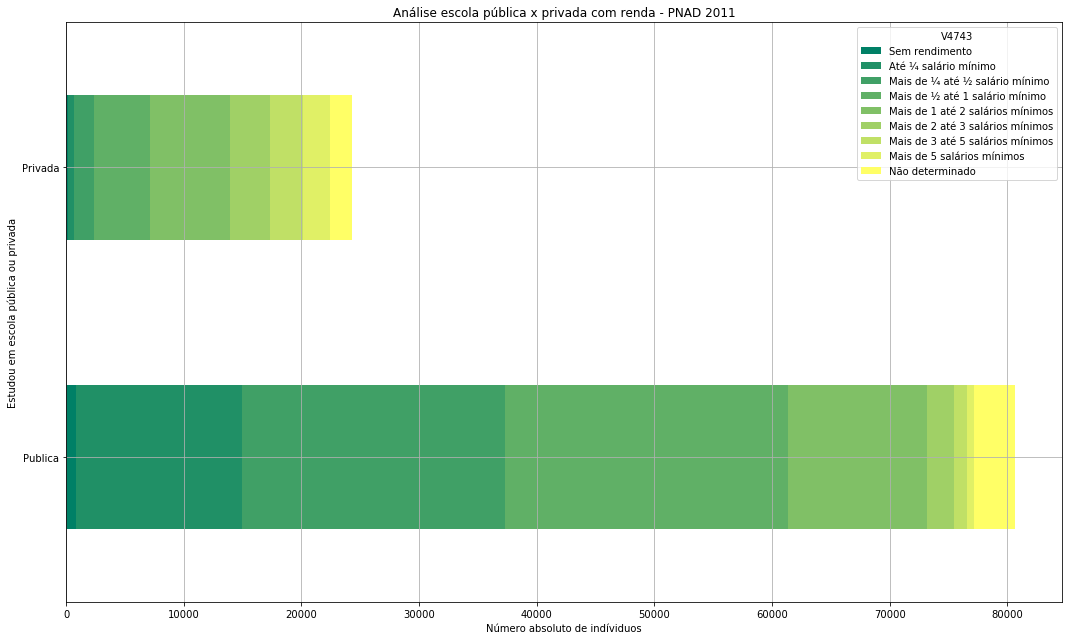

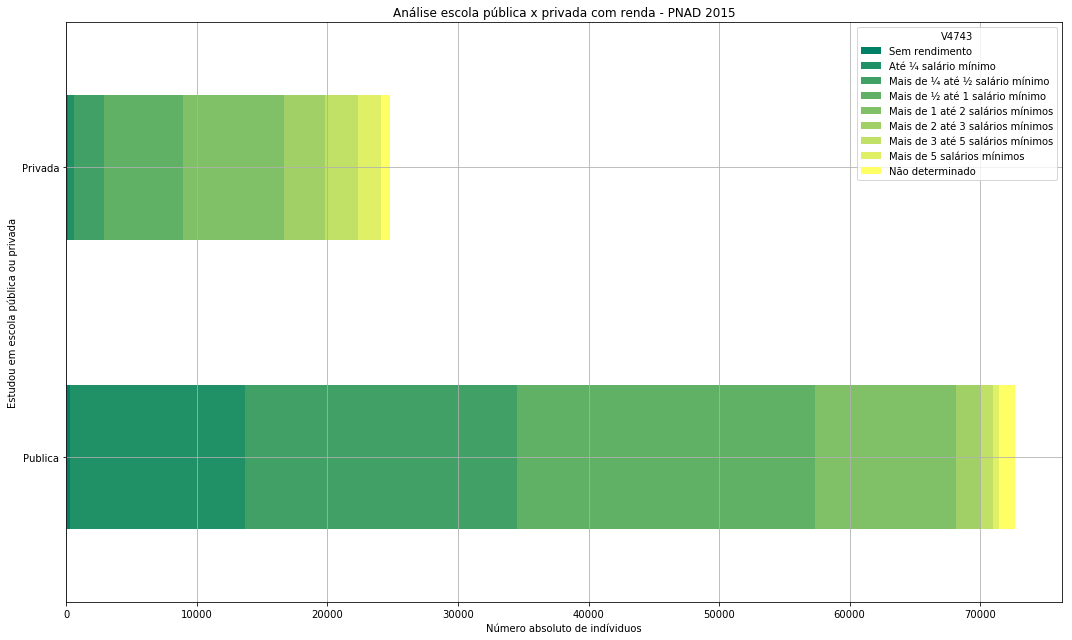

In [77]:
cross_pp_renda.plot(kind='barh',colormap='summer', stacked = True, figsize = (15,9),grid=True)
plt.title('Análise escola pública x privada com renda - PNAD 2011')
plt.xlabel('Número absoluto de indíviduos')
plt.ylabel('Estudou em escola pública ou privada')
plt.tight_layout()
plt.show()

cross_pp_renda_new.plot(kind='barh',colormap='summer', stacked = True, figsize = (15,9),grid=True)
plt.title('Análise escola pública x privada com renda - PNAD 2015')
plt.xlabel('Número absoluto de indíviduos')
plt.ylabel('Estudou em escola pública ou privada')
plt.tight_layout()
plt.show()

### Análise gráfica da relação entre o rendimento per capita dos cidadãos com seus respectivos anos de estudo - PNAD 2011 e 2015

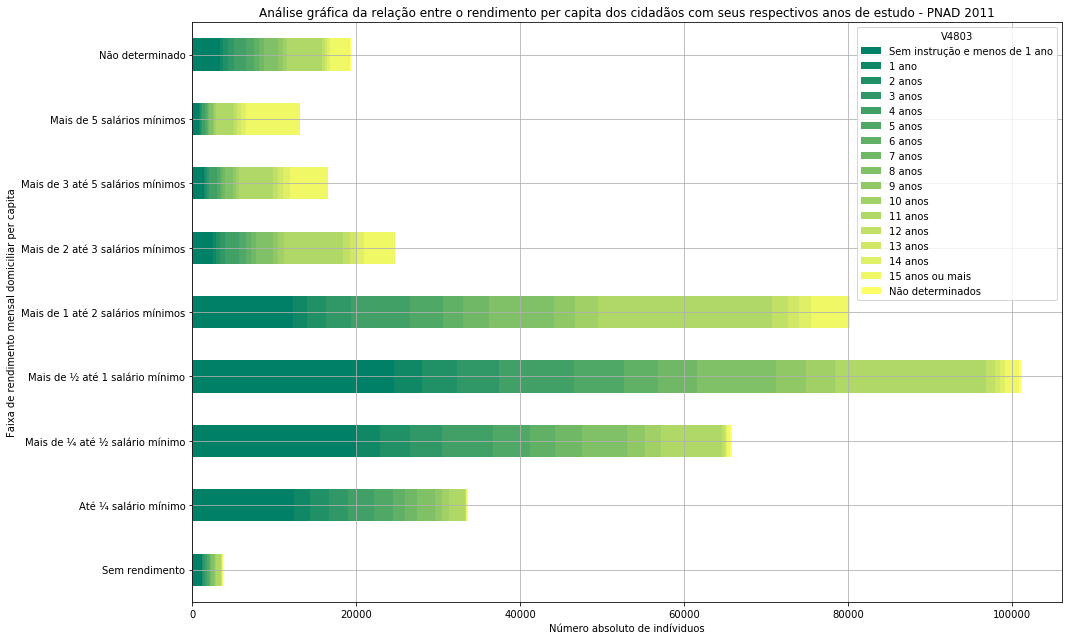

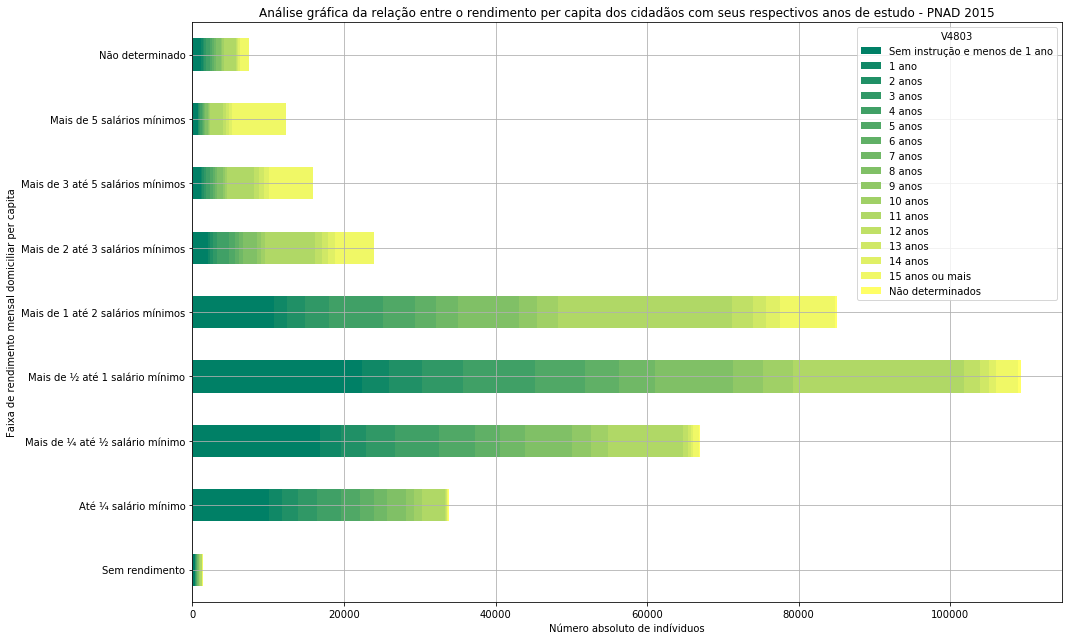

In [70]:
cross_faixa_anos.plot(kind='barh',colormap='summer', stacked = True, figsize = (15,9),grid=True)
plt.title('Análise gráfica da relação entre o rendimento per capita dos cidadãos com seus respectivos anos de estudo - PNAD 2011')
plt.xlabel('Número absoluto de indíviduos')
plt.ylabel('Faixa de rendimento mensal domiciliar per capita')
plt.tight_layout()
plt.show()

cross_faixa_anos_new.plot(kind='barh',colormap='summer', stacked = True, figsize = (15,9),grid=True)
plt.title('Análise gráfica da relação entre o rendimento per capita dos cidadãos com seus respectivos anos de estudo - PNAD 2015')
plt.xlabel('Número absoluto de indíviduos')
plt.ylabel('Faixa de rendimento mensal domiciliar per capita')
plt.tight_layout()
plt.show()

### Análise gráfica da relação entre o rendimento per capita dos cidadãos com seus níveis de escolaridade - PNAD 2011 e 2015

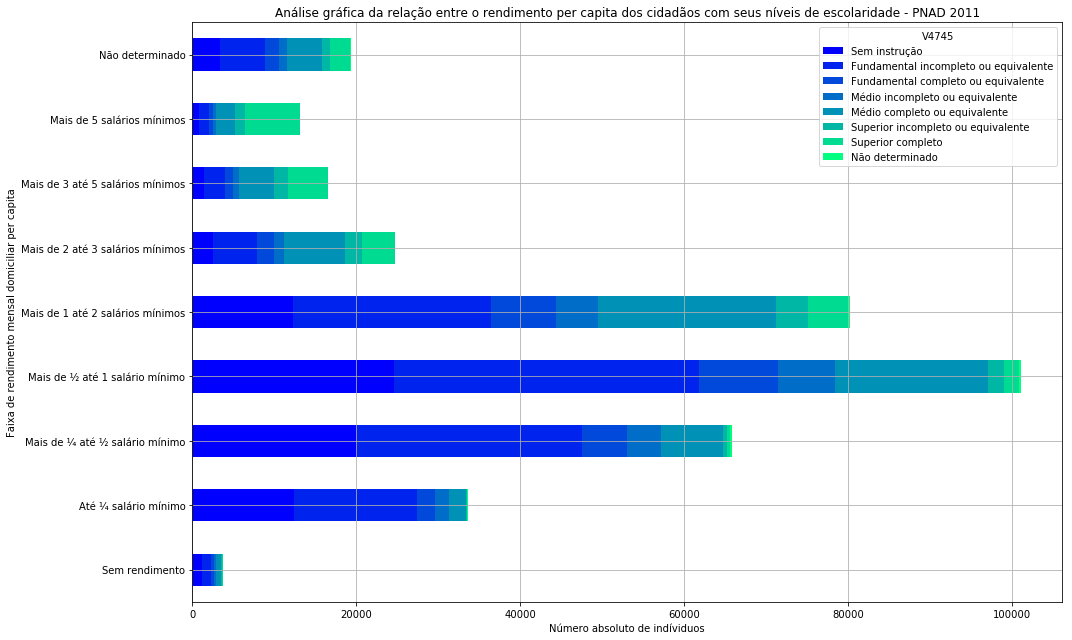

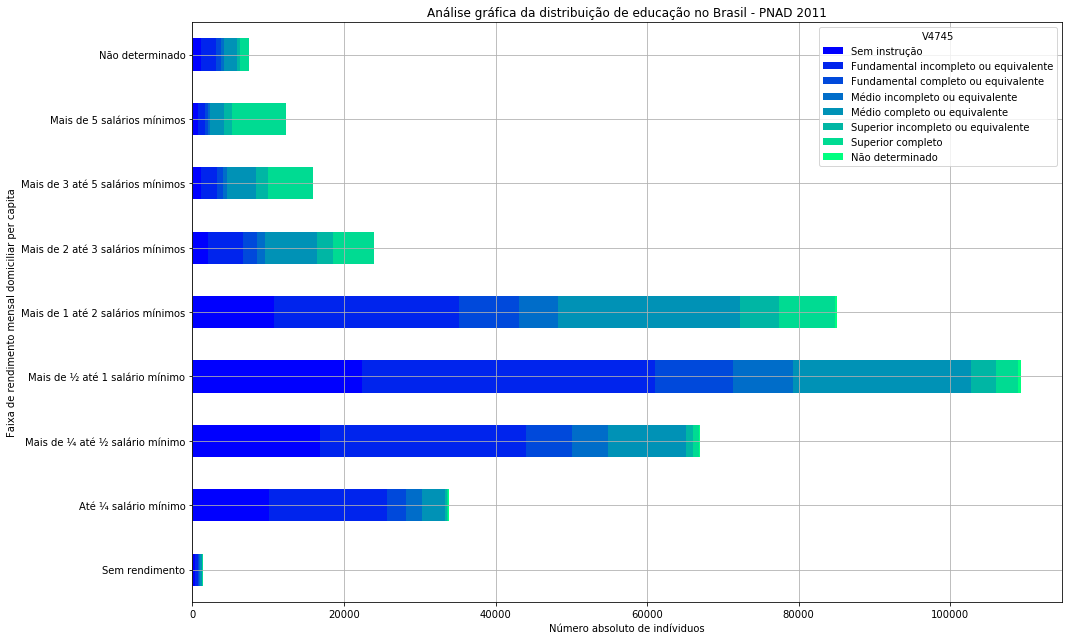

In [71]:
cross_faixa_alcancado.plot(kind='barh',colormap='winter', stacked = True, figsize = (15,9),grid=True)
plt.title('Análise gráfica da relação entre o rendimento per capita dos cidadãos com seus níveis de escolaridade - PNAD 2011')
plt.xlabel('Número absoluto de indíviduos')
plt.ylabel('Faixa de rendimento mensal domiciliar per capita')
plt.tight_layout()
plt.show()

cross_faixa_alcancado_new.plot(kind='barh',colormap='winter', stacked = True, figsize = (15,9),grid=True)
plt.title('Análise gráfica da distribuição de educação no Brasil - PNAD 2011')
plt.xlabel('Número absoluto de indíviduos')
plt.ylabel('Faixa de rendimento mensal domiciliar per capita')
plt.tight_layout()
plt.show()

### Análise gráfica da distribuição de educação no Brasil - PNAD 2011 e 2015

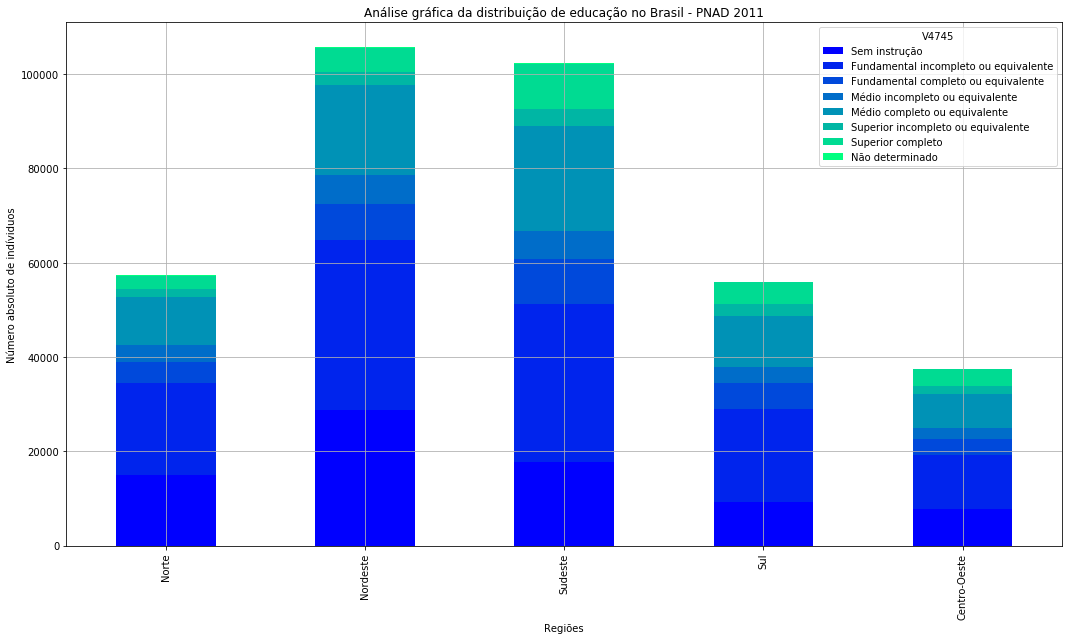

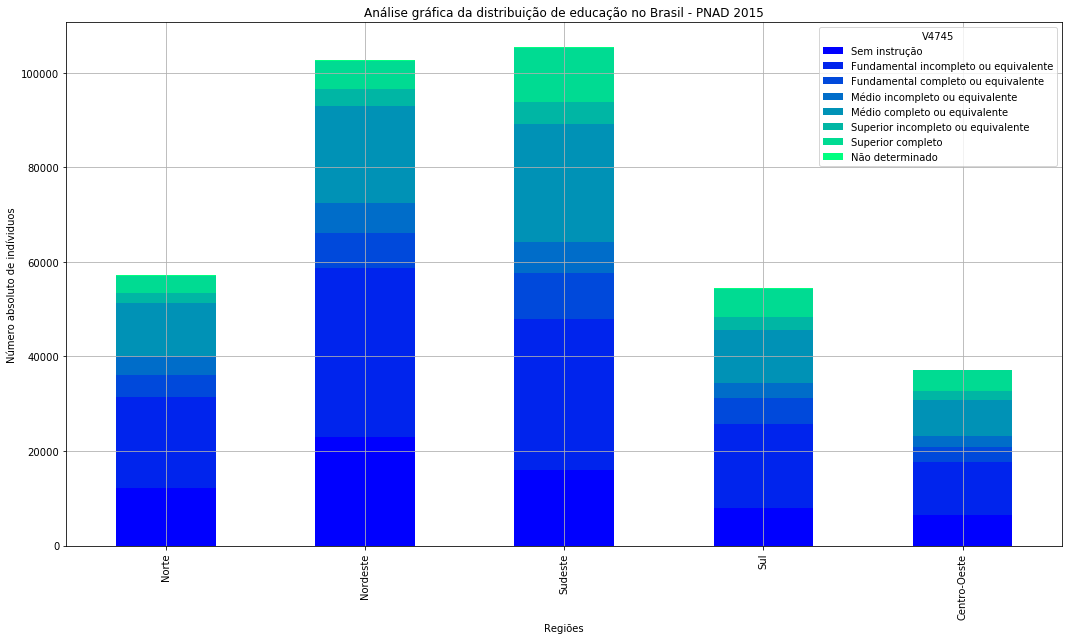

In [72]:
cross_escolaridade_regiao.plot(kind='bar',colormap='winter', stacked = True, figsize = (15,9),grid=True)
plt.title('Análise gráfica da distribuição de educação no Brasil - PNAD 2011')
plt.xlabel('Regiões')
plt.ylabel('Número absoluto de indíviduos')
plt.tight_layout()
plt.show()

cross_escolaridade_regiao_new.plot(kind='bar',colormap='winter', stacked = True, figsize = (15,9),grid=True)
plt.title('Análise gráfica da distribuição de educação no Brasil - PNAD 2015')
plt.xlabel('Regiões')
plt.ylabel('Número absoluto de indíviduos')
plt.tight_layout()
plt.show()

### Análise gráfica da distribuição de renda no Brasil - PNAD 2011 e 2015

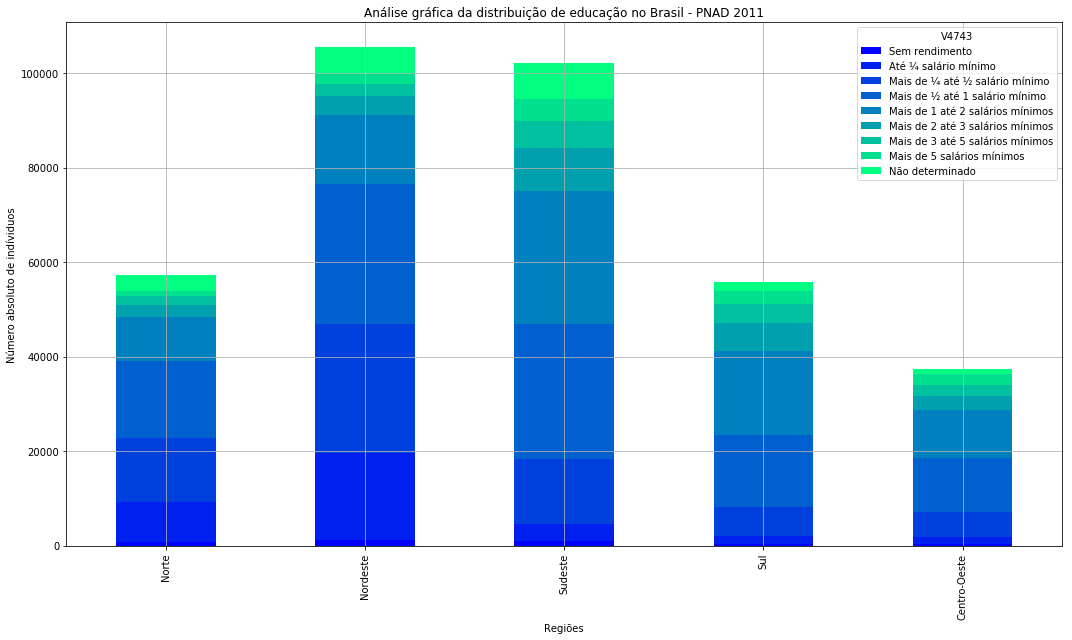

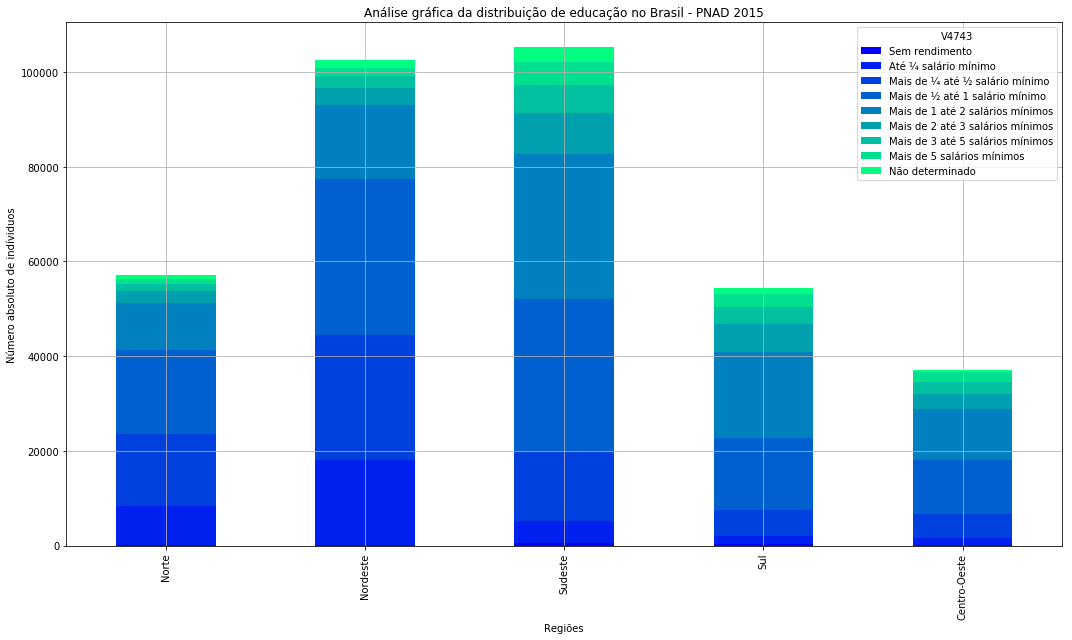

In [73]:
cross_renda_regiao.plot(kind='bar',colormap='winter', stacked = True, figsize = (15,9),grid=True)
plt.title('Análise gráfica da distribuição de renda no Brasil - PNAD 2011')
plt.xlabel('Regiões')
plt.ylabel('Número absoluto de indíviduos')
plt.tight_layout()
plt.show()

cross_renda_regiao_new.plot(kind='bar',colormap='winter', stacked = True, figsize = (15,9),grid=True)
plt.title('Análise gráfica da distribuição de renda no Brasil - PNAD 2015')
plt.xlabel('Regiões')
plt.ylabel('Número absoluto de indíviduos')
plt.tight_layout()
plt.show()

___
## Conclusão 

Com a análise dos gráficos obtidos com a interpretação dos dados das PNAD's 2011 e 2015, o objetivo do trabalho foi alcançado: entender como a renda per capita se relaciona com a educação na amostra de cidadãos brasileiros. É possível interpretar que uma grande parte da população não tem mais de nove anos de estudo e consequentemente não tem formação educacional satisfatório com relação à ìndices internacionais de educação. Junto à isso foi possível observar que quanto maior o nível de instrução dos cidadãos maior é a sua renda. Em paralelo à isso, e fechando um ciclo, interpretamos que os cidadãos em escola privada tem um desenvolvimento educacional muito mais avançado do que aqueles que estudaram em escola pública, uma vez que em números absolutos, as faixas "Superior completo" e "Superior incompleto ou equivalente" são significativamente maiores na barra "Privada" do que na barra "Pública", sendo que o número de indíviudos contabilizados na barra "Pública" é cerca de três vezes maior que na barra "Privada". Uma possível interpretação também é de que mesmo com o superior completo uma boa parte da população não consegue atingir uma renda per capita de mais que "3 salários mínimos" o que remete a baixa remuneração de indíviduos especializados (pouco reconhecimento de trabalho). Quando plotamos os gráficos relacionados a renda e escolaridade nos estados é possível identificar que uma pequena parcela da população (elite) tem tanto os maiores indíces de escolaridade e renda o que justifica concluir que o Brasil sofre tremendamente de um alto nível de desigualdade socio-econômica.